<a href="https://colab.research.google.com/github/razan-25/Reading-habit-analysis/blob/main/reading_habit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df=pd.read_csv("sleep and psychological effects.csv")
df

,User_ID,Age,Gender,Favorite_Book_Genre,Weekly_Reading_Time(hours),Mood_Impact
0,1,24,f,Fiction,6,Positive
1,2,32,m,Science,2,Neutral
2,3,18,f,Romance,8,Positive
3,4,45,m,History,3,Neutral
4,5,29,f,Fantasy,10,Positive
...,...,...,...,...,...,...
60,61,35,f,Romance,8,Positive
61,62,20,m,Fantasy,9,Positive
62,63,33,f,Science,1,Negative
63,64,30,m,Self-Help,6,Positive


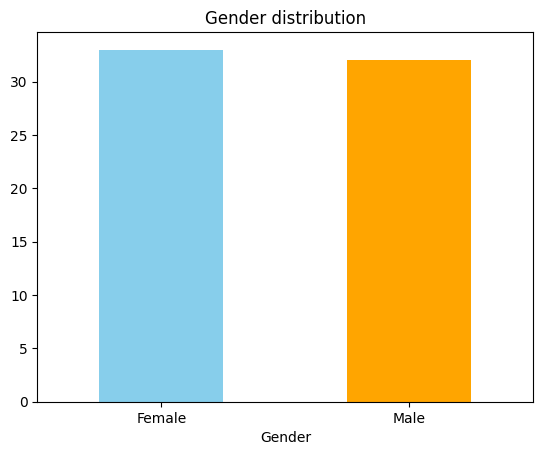

In [54]:
import matplotlib.pyplot as plt
colors = ['skyblue', 'orange']
ax = df["Gender"].value_counts().plot.bar(color=colors)

ax.set_title("Gender distribution")


ax.set_xticklabels(['Female', 'Male'], rotation=0)


plt.show()

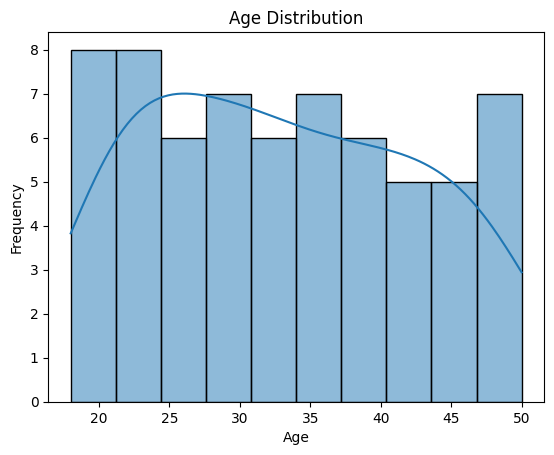

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# التأكد من وجود العمود ونوع البيانات
if 'Age' not in df.columns:
    raise ValueError("The column 'Age' is not in the DataFrame.")
if not pd.api.types.is_numeric_dtype(df['Age']):
    raise ValueError("The 'Age' column must contain numeric data.")

# إزالة القيم المفقودة
df = df.dropna(subset=['Age'])

# رسم التوزيع
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

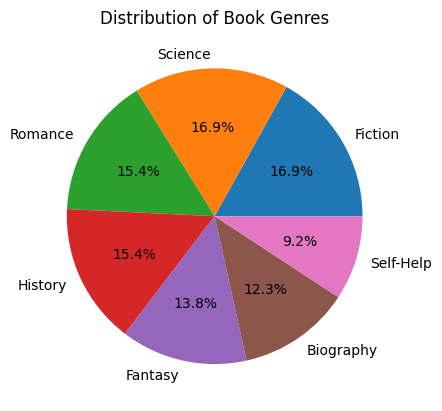

In [55]:
#visualize the genre of favorite books distribution
book_genres = list(df['Favorite_Book_Genre'].unique())
genre_count = list(df['Favorite_Book_Genre'].value_counts().values)

plt.pie(data=df, labels=book_genres, x=genre_count, autopct='%1.1f%%')
plt.title('Distribution of Book Genres')
plt.show()

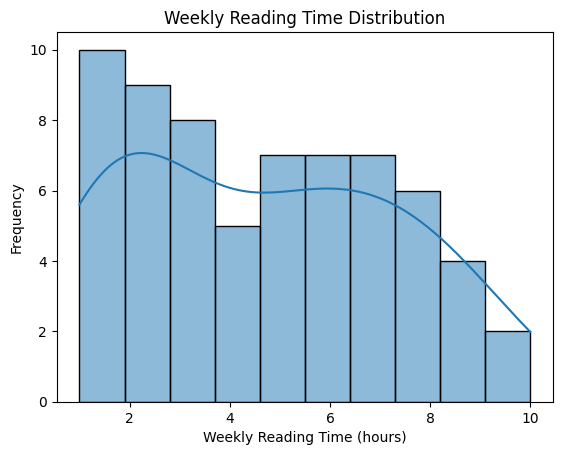

In [56]:
# Weekly reading time distribution
sns.histplot(df['Weekly_Reading_Time(hours)'], bins=10, kde=True)
plt.title('Weekly Reading Time Distribution')
plt.xlabel('Weekly Reading Time (hours)')
plt.ylabel('Frequency')
plt.show()

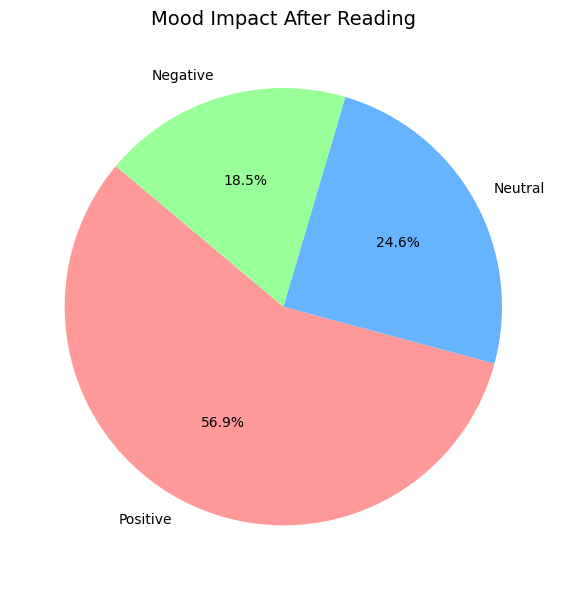

In [62]:
import matplotlib.pyplot as plt

# Calculate the mood impact distribution
mood_impact_counts = df['Mood_Impact'].value_counts()

# Ensure there are three distinct categories; if fewer, we'll still show the chart
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Three colors: red, blue, green

# Plot the pie chart
plt.figure(figsize=(6, 6))
mood_impact_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)

# Adding title
plt.title('Mood Impact After Reading', fontsize=14)
plt.ylabel('')  # Hide y-axis label for cleaner look
plt.tight_layout()

# Show the plot
plt.show()

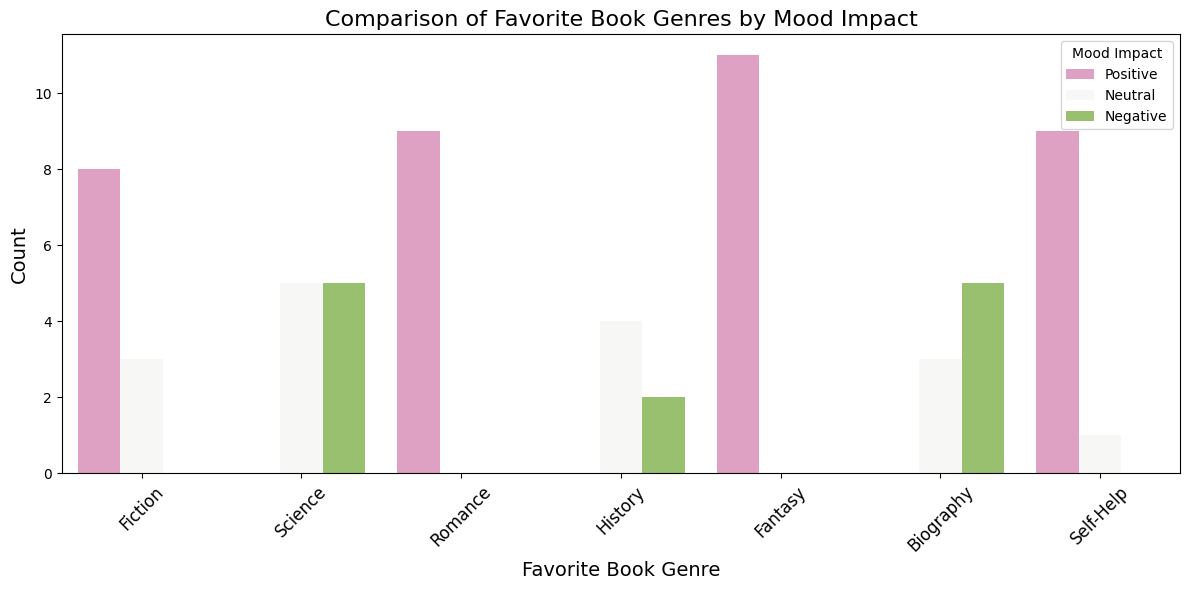

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Favorite_Book_Genre by Mood_Impact
plt.figure(figsize=(12, 6))
sns.countplot(x='Favorite_Book_Genre', hue='Mood_Impact', data=df, palette='PiYG')

# Adding title and labels
plt.title('Comparison of Favorite Book Genres by Mood Impact', fontsize=16)
plt.xlabel('Favorite Book Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Mood Impact')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

In [70]:
genre_mood_ct = pd.crosstab(df['Favorite_Book_Genre'], df['Mood_Impact'])
print(genre_mood_ct)

Mood_Impact          Negative  Neutral  Positive
Favorite_Book_Genre                             
Biography                   5        3         0
Fantasy                     0        0        11
Fiction                     0        3         8
History                     2        4         0
Romance                     0        0         9
Science                     5        5         0
Self-Help                   0        1         9


<ipython-input-69-1bac39ca25cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders, y=reading_averages,


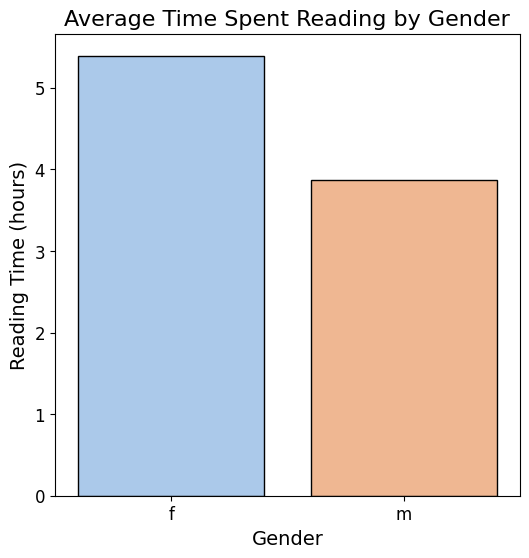

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب متوسط وقت القراءة لكل جنس
average_reading_by_gender = df.groupby('Gender')['Weekly_Reading_Time(hours)'].mean()

# تحويل النتائج إلى قائمة
genders = average_reading_by_gender.index.tolist()  # ['Female', 'Male']
reading_averages = average_reading_by_gender.values.tolist()  # [متوسط الإناث, متوسط الذكور]

# رسم النتائج
plt.figure(figsize=(6, 6))
sns.barplot(x=genders, y=reading_averages,
            palette='pastel', edgecolor='black')
# تخصيص الرسم
plt.title('Average Time Spent Reading by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Reading Time (hours)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# عرض الرسم
plt.show()

<ipython-input-71-2aee17eed47b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mood_Impact', y='Weekly_Reading_Time(hours)', data=df, palette='viridis')


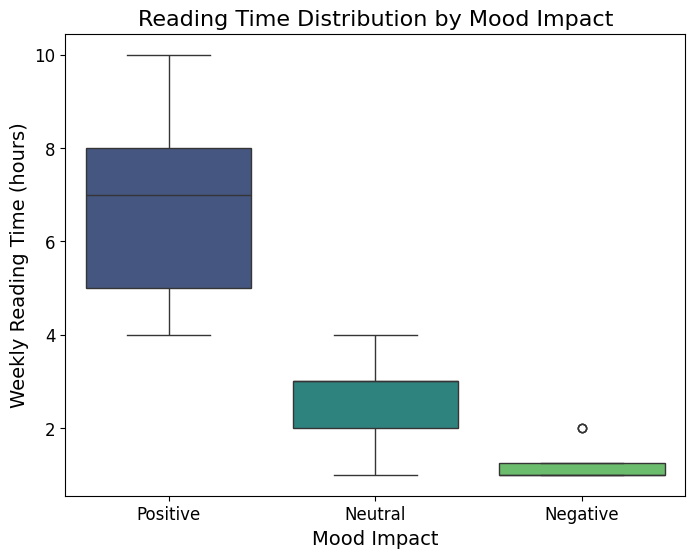

Average Weekly Reading Time by Mood Impact:
Mood_Impact
Negative    1.250000
Neutral     2.562500
Positive    6.648649
Name: Weekly_Reading_Time(hours), dtype: float64


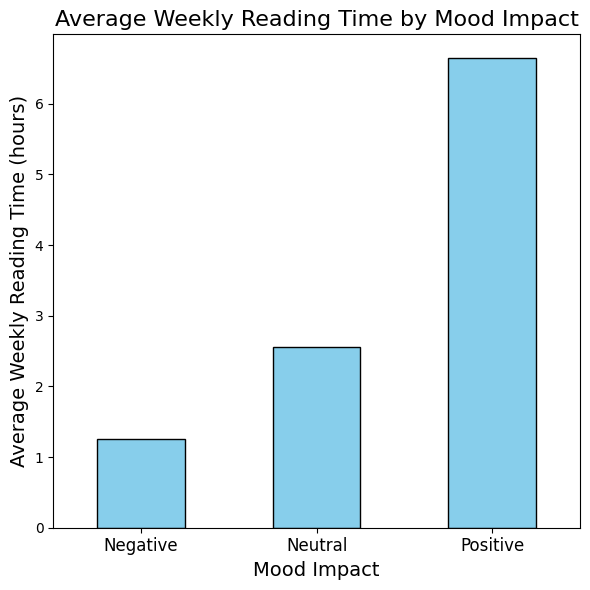


ANOVA Test Results:
Statistic: 94.70, P-value: 0.00000
There is a significant difference in reading time between mood impact categories.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# رسم العلاقة بين وقت القراءة وتأثير المزاج
plt.figure(figsize=(8, 6))
sns.boxplot(x='Mood_Impact', y='Weekly_Reading_Time(hours)', data=df, palette='viridis')

# تخصيص الرسم
plt.title('Reading Time Distribution by Mood Impact', fontsize=16)
plt.xlabel('Mood Impact', fontsize=14)
plt.ylabel('Weekly Reading Time (hours)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# حساب متوسط وقت القراءة لكل فئة من Mood_Impact
average_reading_by_mood = df.groupby('Mood_Impact')['Weekly_Reading_Time(hours)'].mean()
print("Average Weekly Reading Time by Mood Impact:")
print(average_reading_by_mood)

# رسم الأعمدة لتمثيل المتوسط
plt.figure(figsize=(6, 6))
average_reading_by_mood.plot(kind='bar', color='skyblue', edgecolor='black')

# تخصيص الرسم
plt.title('Average Weekly Reading Time by Mood Impact', fontsize=16)
plt.xlabel('Mood Impact', fontsize=14)
plt.ylabel('Average Weekly Reading Time (hours)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# اختبار ANOVA للتحقق من الفرق بين الفئات
positive = df[df['Mood_Impact'] == 'Positive']['Weekly_Reading_Time(hours)']
neutral = df[df['Mood_Impact'] == 'Neutral']['Weekly_Reading_Time(hours)']
negative = df[df['Mood_Impact'] == 'Negative']['Weekly_Reading_Time(hours)']

stat, p = f_oneway(positive, neutral, negative)
print("\nANOVA Test Results:")
print(f"Statistic: {stat:.2f}, P-value: {p:.5f}")

# تفسير النتائج بناءً على قيمة P
if p < 0.05:
    print("There is a significant difference in reading time between mood impact categories.")
else:
    print("No significant difference in reading time between mood impact categories.")